# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [187]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview

combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [188]:
# Checking the number of mice. = 249
combined_data["Mouse ID"].nunique()

249

In [189]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. = array(['g989'], dtype=object)
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [190]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_data.loc[(combined_data["Mouse ID"] == "g989")]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [191]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.loc[(combined_data["Mouse ID"] != "g989")]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [192]:
# Checking the number of mice in the clean DataFrame. = 248
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [193]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_data = clean_df.groupby("Drug Regimen")

tumor_mean = drug_data["Tumor Volume (mm3)"].mean()
tumor_median = drug_data["Tumor Volume (mm3)"].median()
tumor_var = drug_data["Tumor Volume (mm3)"].var()
tumor_std = drug_data["Tumor Volume (mm3)"].std()
tumor_sem = drug_data["Tumor Volume (mm3)"].sem()

summary_stats_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                "Median Tumor Volume": tumor_median,
                                "Tumor Volume Variance": tumor_var,
                                "Tumor Volume Std. Dev.": tumor_std,
                                "Tumor Volume Std. Err.": tumor_sem,})

summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [194]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_stats2_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

summary_stats2_df.columns = ["mean", "median", "var", "std", "sem"]
summary_stats2_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

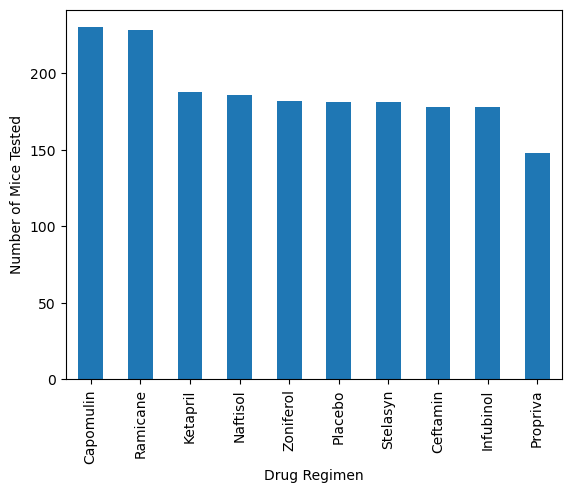

In [195]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_pl = clean_df.groupby("Drug Regimen")["Timepoint"].count()
timepoint_pl = timepoint_pl.sort_values(ascending=False)

timepoint_pl.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()


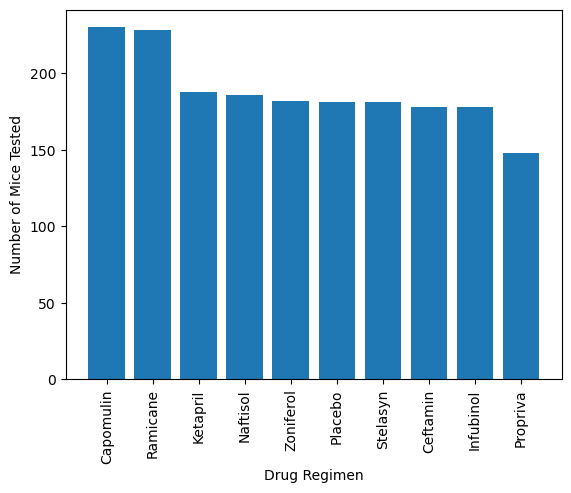

In [196]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(timepoint_pl.index, timepoint_pl.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()



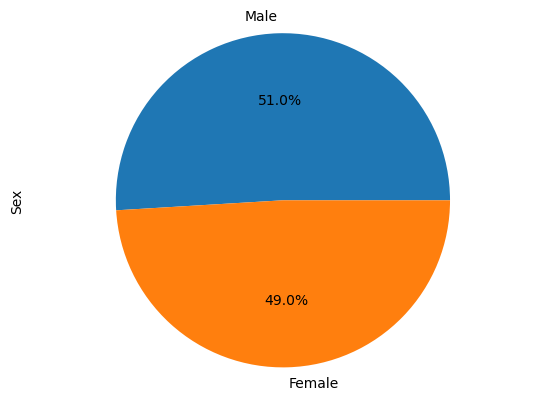

In [197]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_pie = clean_df["Sex"].value_counts()

sex_pie.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.show()


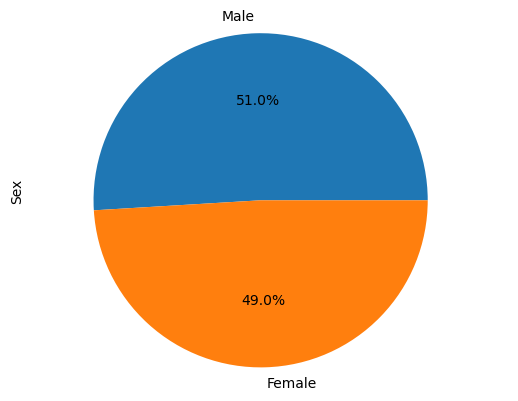

In [198]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_pie.values, labels=sex_pie.index, autopct="%1.1f%%")
plt.axis("equal")
plt.text(-1.5,0, "Sex", rotation="vertical")
plt.show()


## Quartiles, Outliers and Boxplots

In [199]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_tp = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = pd.merge(clean_df, greatest_tp, how='inner', on=["Mouse ID", "Timepoint"])

In [200]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(subset)
    
    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = subset.loc[(subset < lower_bound) | (subset > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


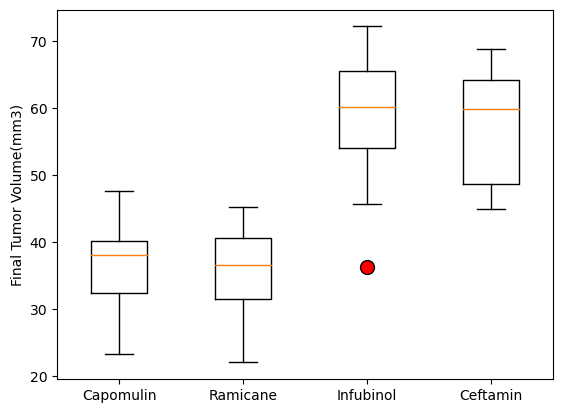

In [201]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.ylabel("Final Tumor Volume(mm3)")
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
plt.boxplot(tumor_vol_data, 
            labels=labels, 
            flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})

# Found the flierprops code at: https://stackoverflow.com/questions/65648502/how-to-change-outlier-point-symbol-in-python-matplotlib-pyplot

plt.show()

## Line and Scatter Plots

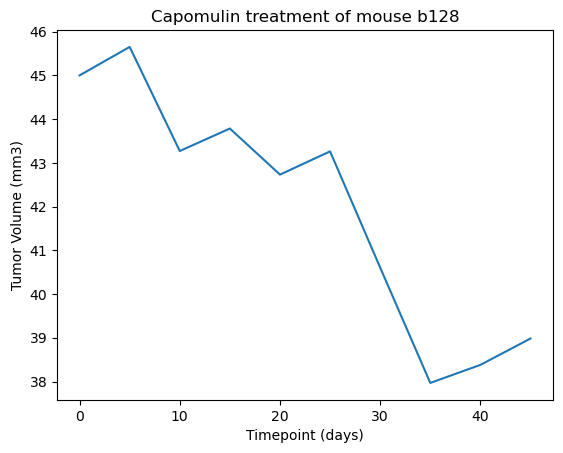

In [202]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin - b128
capomulin_df = clean_df.loc[(combined_data["Drug Regimen"] == "Capomulin")]
mouse_id = "b128"
mouse_df = capomulin_df[capomulin_df["Mouse ID"] == mouse_id]
plot_df = mouse_df[["Timepoint", "Tumor Volume (mm3)"]]

plt.plot(plot_df["Timepoint"], plot_df["Tumor Volume (mm3)"])

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.show()

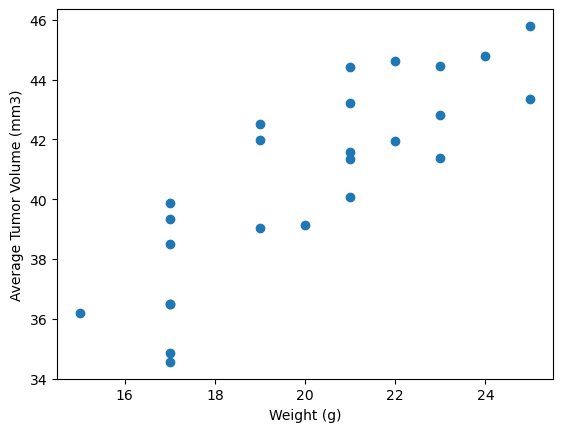

In [249]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
import numpy as np

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

mouse_average = capomulin_df.groupby("Mouse ID").mean()[["Weight (g)", "Tumor Volume (mm3)"]]

plt.scatter(mouse_average["Weight (g)"], mouse_average["Tumor Volume (mm3)"])

            
plt.show()


## Correlation and Regression

The correlation coefficient between mouse wight and the average tumor volume is 0.84


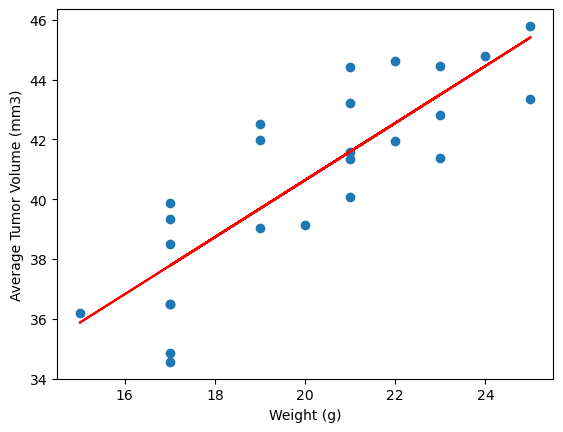

In [272]:
from scipy.stats import linregress, pearsonr

# Calculate the correlation coefficient and linear regression model 
plt.scatter(mouse_average["Weight (g)"], mouse_average["Tumor Volume (mm3)"])

correlation_coef, _ = pearsonr(mouse_average["Weight (g)"],mouse_average["Tumor Volume (mm3)"])
print(f"The correlation coefficient between mouse wight and the average tumor volume is {round(correlation_coef, 2)}")

slope, intercept, rvalue, pvalue, stderr = linregress(mouse_average["Weight (g)"], mouse_average["Tumor Volume (mm3)"])
regress_values = slope * mouse_average["Weight (g)"] + intercept

plt.plot(mouse_average["Weight (g)"], regress_values, color='red')

# for mouse weight and average tumor volume for the Capomulin regimen

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()
